# Can pymc3 easily use the distributions from scipy as additional dists?

In [13]:
import pymc3 as pm
import numpy as np
import scipy
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from spacepy import toolbox as tb

sns.set(font_scale=1.5)

## There is an interpolsted that can do it
slow?

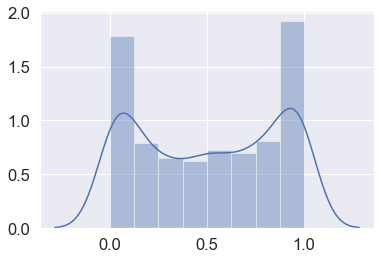

In [12]:
sns.distplot(scipy.stats.arcsine.rvs(size=1000))

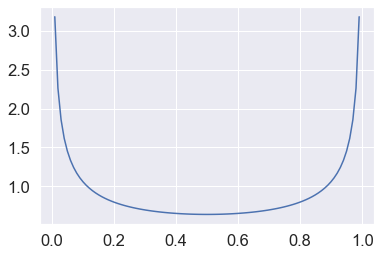

In [15]:
X = np.linspace(0, 1, 100)
Y = scipy.stats.arcsine.pdf(X)
plt.plot(X, Y)

In [28]:
with pm.Model() as model:
    arcsine = pm.Interpolated('arcsine', X, Y, testval=0.5, observed=[.3, .4, .5])
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step)
    

ValueError: No free random variables to sample.

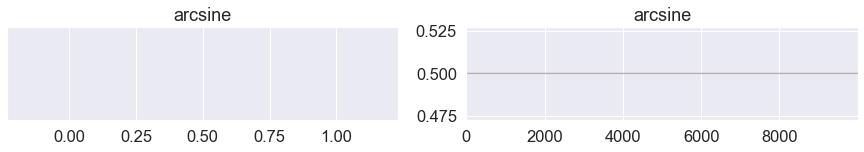

In [25]:
pm.traceplot(trace);

In [26]:
pm.plot_posterior(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c32191d50>],
      dtype=object)

/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  func(*args, **kwargs)
/Users/balarsen/miniconda3/envs/python3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 349x77250 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [2]:
class arcsin3(mc3.Continuous):
    def random(self, point=None, size=None, repeat=None):
        return scipy.stats.arcsine.rvs(size=size, loc=point)
        
    def logp(self, value):
        return scipy.stats.arcsine.logpdf(value, loc=value)

In [5]:
with mc3.Model() as model:
    a = arcsin3('arcsin', 0, testval=1)

TypeError: Variables do not support boolean operations.